<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

In this lab, we delve into the fundamental concept of feature selection. We start by conducting correlation analysis to identify relevant features for our regression model. By examining the relationship between each feature and the target variable, we aim to pick the most influential features. Additionally, we explore the significance of cross validation in model evaluation and how it relates to feature selection. Through cross validation, we ensure that our model generalises well to unseen data by assessing its performance across multiple validation sets.

### 1. Load & Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [2]:
# Read CSV
wine = r'C:\Users\Vinitha\Desktop\IOD\DATA\winequality_merged.csv'
df = pd.read_csv(wine)
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  red_wine  
6492     11.2        6         0  
6493      9.6        5         0  
6494      9.4        6         0  
6495     12.8        7         0  
6496     11.8        6         0

#### 1.2 Explore Data (Exploratory Data Analysis)

In [3]:
# ANSWER 
df.describe().T

count        mean        std      min       25%  \
fixed acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   
red_wine              6497.0    0.246114   0.430779  0.00000   0.00000   

                            50%        75%        max  
fixed acidity           7.00000    7.70000   15.90000  
volatile acidity        0.29000    0.40000    1.58000  
citric acid             0.31000    0.39000    1.66000  
residual sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free sulfur dioxide    29.00000   41.00000  289.00000  
total sulfur dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000  
red_wine                0.00000    0.00000    1.00000

In [4]:
df.sample(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4119            7.5              0.41         0.23            14.8      0.054   
1908            6.2              0.31         0.26             4.8      0.037   
780             7.0              0.57         0.00             2.0      0.190   
3788            7.1              0.18         0.32            12.2      0.048   
6127            6.4              0.37         0.19             3.5      0.068   
3666            7.6              0.29         0.29             4.4      0.051   
2015            7.4              0.21         0.27             1.2      0.041   
4532            6.9              0.22         0.31             6.3      0.029   
5930            7.4              0.38         0.34             8.3      0.052   
5903            6.1              0.24         0.25             1.6      0.044   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4119                 28.0                 174.0  0.99898  3.18       0.49   
1908                 36.0                 148.0  0.99280  3.21       0.41   
780                  12.0                  45.0  0.99676  3.31       0.60   
3788                 36.0                 125.0  0.99670  2.92       0.54   
6127                 18.0                 101.0  0.99340  3.03       0.38   
3666                 26.0                 146.0  0.99390  3.16       0.39   
2015                 27.0                  99.0  0.99270  3.19       0.33   
4532                 41.0                 131.0  0.99326  3.08       0.49   
5930                 44.0                 168.0  0.99627  3.11       0.52   
5903                 24.0                 115.0  0.99210  3.39       0.59   

      alcohol  quality  red_wine  
4119      9.7        5         0  
1908     10.4        6         0  
780       9.4        6         1  
3788      9.4        6         0  
6127      9.0        6         0  
3666     10.2        5         0  
2015      9.8        6         0  
4532     10.8        6         0  
5930      9.2        5         0  
5903     10.9        6         0

<Axes: xlabel='quality', ylabel='Count'>

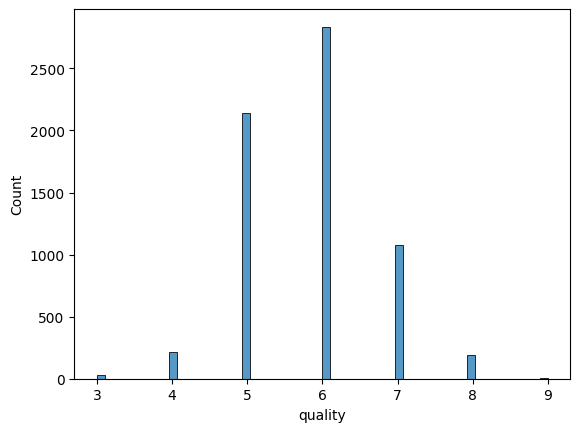

In [7]:
sns.histplot(df['quality'])

In [14]:
df_corr = df.corr()
df_corr

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   
red_wine                   0.486740          0.653036    -0.187397   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidity           -0.196011   0.377124            -0.352557   
citric acid                 0.142451   0.038998             0.133126   
residual sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free sulfur dioxide         0.402871  -0.195045             1.000000   
total sulfur dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
quality                    -0.036980  -0.200666             0.055463   
red_wine                   -0.348821   0.512678            -0.471644   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile acidity                 -0.414476  0.271296  0.261454   0.225984   
citric acid                       0.195242  0.096154 -0.329808   0.056197   
residual sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free sulfur dioxide               0.720934  0.025717 -0.145854  -0.188457   
total sulfur dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
quality                          -0.041385 -0.305858  0.019506   0.038485   
red_wine                         -0.700357  0.390645  0.329129   0.487218   

                       alcohol   quality  red_wine  
fixed acidity        -0.095452 -0.076743  0.486740  
volatile acidity     -0.037640 -0.265699  0.653036  
citric acid          -0.010493  0.085532 -0.187397  
residual sugar       -0.359415 -0.036980 -0.348821  
chlorides            -0.256916 -0.200666  0.512678  
free sulfur dioxide  -0.179838  0.055463 -0.471644  
total sulfur dioxide -0.265740 -0.041385 -0.700357  
density              -0.686745 -0.305858  0.390645  
pH                    0.121248  0.019506  0.329129  
sulphates            -0.003029  0.038485  0.487218  
alcohol               1.000000  0.444319 -0.032970  
quality               0.444319  1.000000 -0.119323  
red_wine             -0.032970 -0.119323  1.000000

<Axes: >

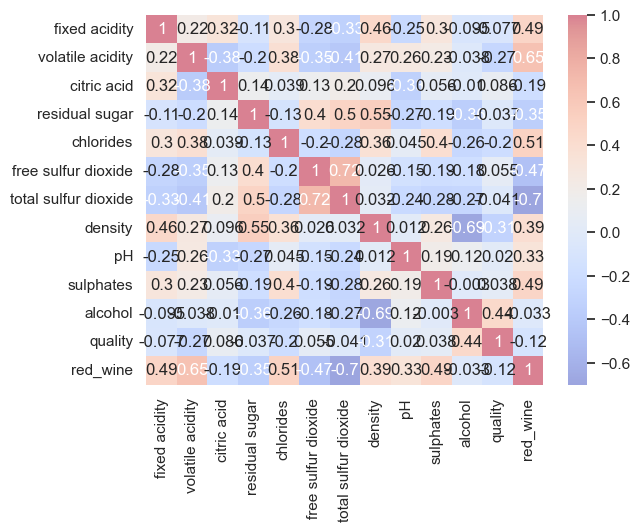

In [15]:
sns.heatmap(df_corr, annot=True, cmap='coolwarm', alpha=0.5)

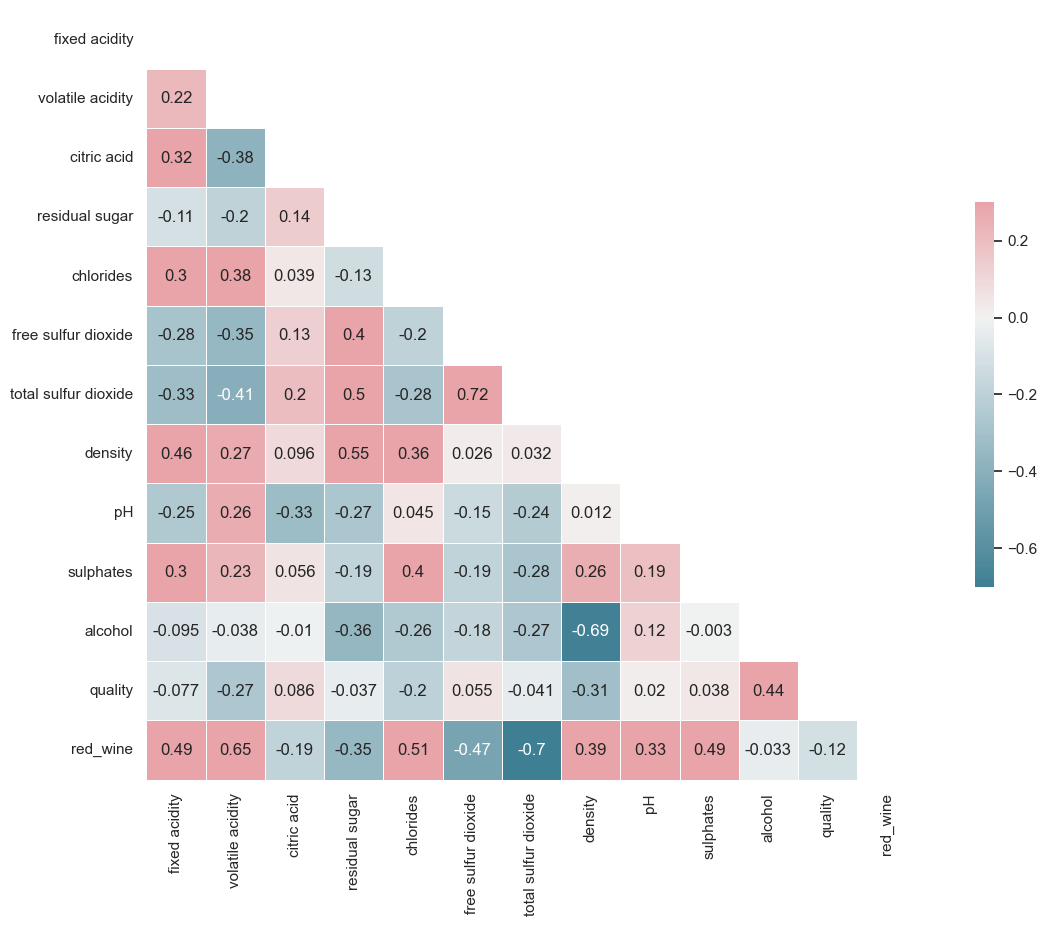

In [24]:
sns.set(style="white")

mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

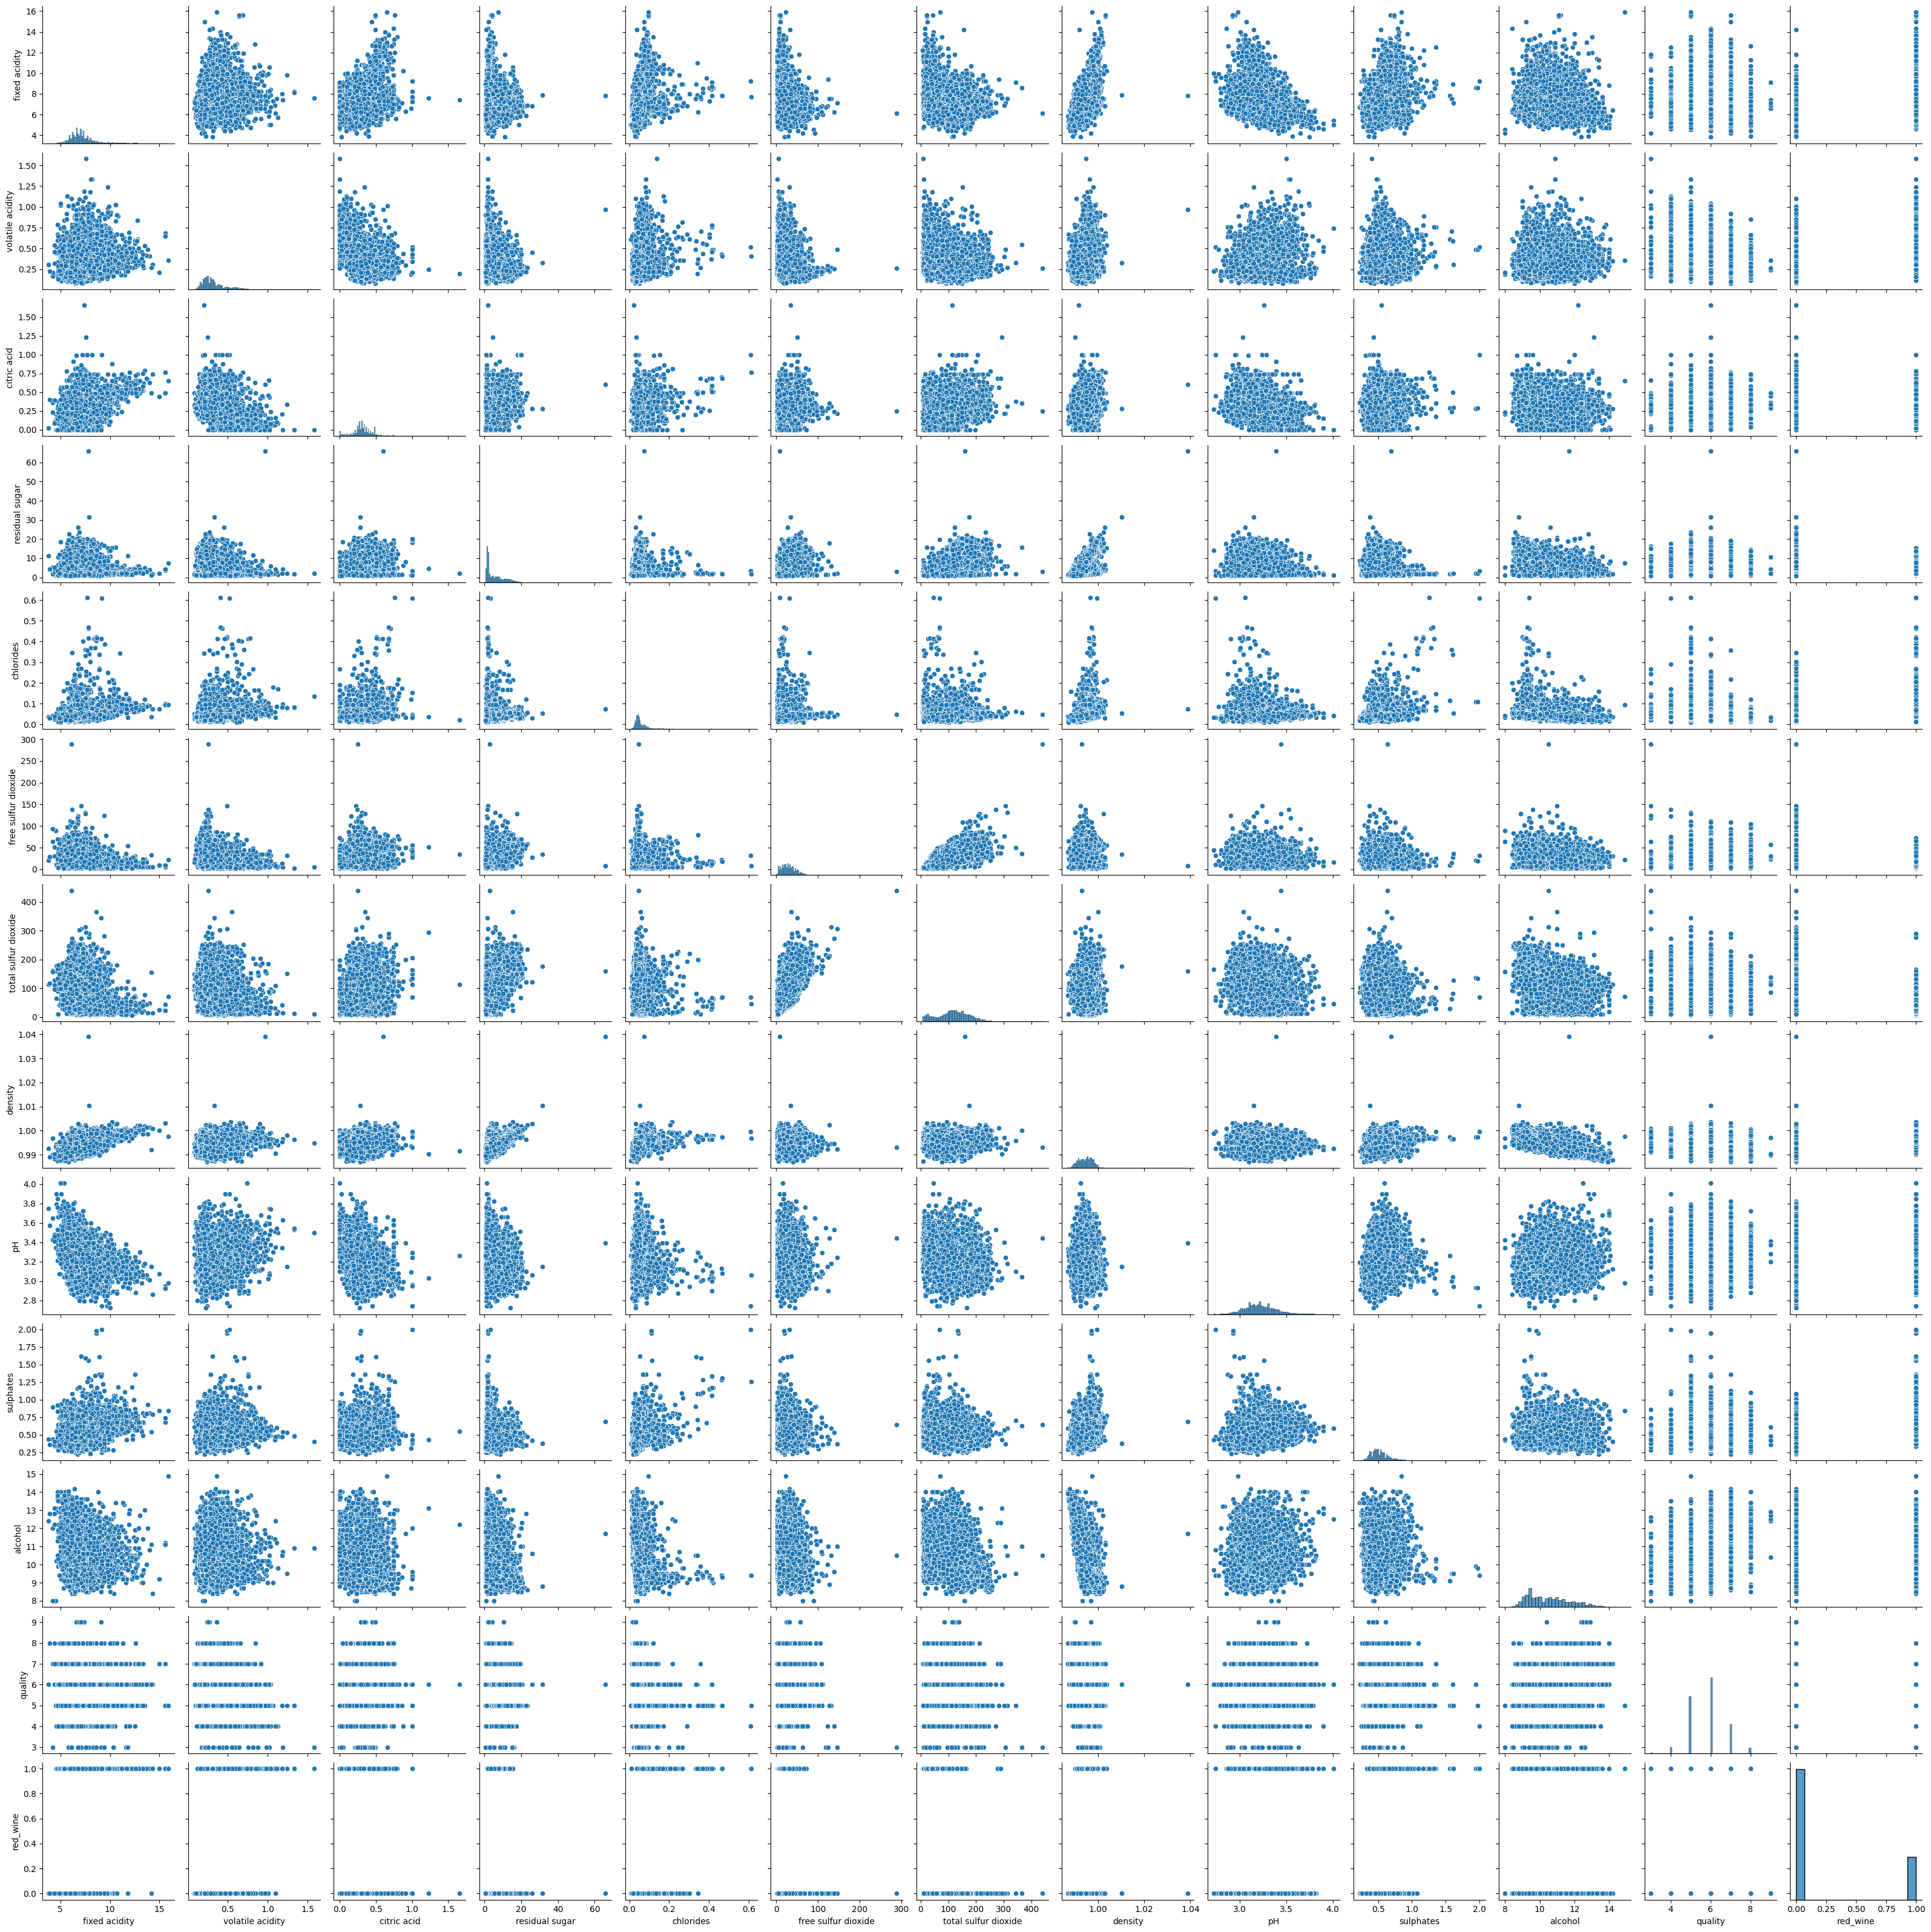

In [8]:
sns.pairplot(df)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2630d84caa0>,
 'caps': [<matplotlib.lines.Line2D at 0x2630c19d220>,
 'boxes': [<matplotlib.lines.Line2D at 0x2630d610740>],
 'medians': [<matplotlib.lines.Line2D at 0x2630bcfa900>],
 'fliers': [<matplotlib.lines.Line2D at 0x2630bcfa6f0>],
 'means': []}

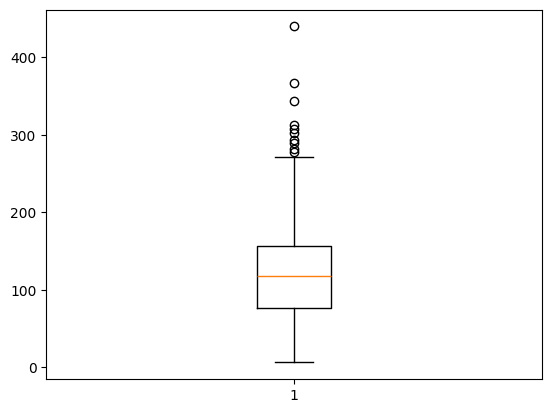

In [9]:
plt.boxplot(df['total sulfur dioxide'])

In [11]:
features = []
# Calculate Q1, Q3, and IQR for each feature
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers for each feature
outlier_condition = ((df[features] < (Q1 - 1.5 * IQR)) | 
                     (df[features] > (Q3 + 1.5 * IQR))).any(axis=1)
					 
# Exclude outliers
data_no_outliers = df[~outlier_condition]

### 2. Set Target Variable

Create a target variable for wine quality.

In [25]:
# Target Variable
y = df['quality']

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reasoning for the choices you make.

In [26]:
# ANSWER
df.corr()['quality'].sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
red_wine               -0.119323
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

In [33]:
predictor_columns = ['alcohol', 'density', 'volatile acidity','chlorides']

In [34]:
X = df[predictor_columns]
X.head()

alcohol  density  volatile acidity  chlorides
0      9.4   0.9978              0.70      0.076
1      9.8   0.9968              0.88      0.098
2      9.8   0.9970              0.76      0.092
3      9.8   0.9980              0.28      0.075
4      9.4   0.9978              0.70      0.076

### 4. Using Linear Regression Create a Model and Test Score

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [36]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [37]:
# Create a model for Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Fit the model with the Training data
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)
# Calculate the score (R^2 for Regression) for Training Data

# Calculate the score (R^2 for Regression) for Testing Data


lr_coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': lr.coef_})
lr_coef_df

feature  coefficient
0           alcohol     0.391877
1           density    40.832975
2  volatile acidity    -1.512504
3         chlorides    -0.082437

## BONUS: Cross validation

In [44]:
# Cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [45]:
# Set up 5-fold cross validation
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):

    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]

    # Fit model with training set
    lr.fit(X_train, y_train)

    # Make predictions with training and test set
    train_preds = lr.predict(X_train)
    test_preds = lr.predict(X_test)

    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(lr.score(X_train, y_train))
    test_scores.append(lr.score(X_test, y_test))

    train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))

# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'Training R2': train_scores,
                           'Test R2': test_scores,
                           'Training RMSE': train_rmse,
                           'Test RMSE': test_rmse},
                          index=[i+1 for i in range(5)])

metrics_df

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To cal

Training R2   Test R2  Training RMSE  Test RMSE
1     0.261124  0.295112       0.759406   0.697463
2     0.268280  0.262282       0.746008   0.753668
3     0.272911  0.244615       0.744626   0.758656
4     0.264226  0.275811       0.742970   0.765980
5     0.271465  0.250580       0.743272   0.763993

In [46]:
# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df.describe()

Training R2   Test R2  Training RMSE  Test RMSE
count     5.000000  5.000000       5.000000   5.000000
mean      0.267601  0.265680       0.747256   0.747952
std       0.004922  0.020323       0.006898   0.028630
min       0.261124  0.244615       0.742970   0.697463
25%       0.264226  0.250580       0.743272   0.753668
50%       0.268280  0.262282       0.744626   0.758656
75%       0.271465  0.275811       0.746008   0.763993
max       0.272911  0.295112       0.759406   0.765980

In [ ]:
# Describe the metrics

### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data?

How many feature have you selected? Can you improve your score by selecting different features?

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > Â© 2024 Institute of Data


---



---



